,ID_da_microregiao,Valor_bruto_agropecuaria,Valor_bruto_industria,Valor_bruto_servicos,Valor_bruto_administracao,Valor_bruto_total,Impostos,PIB,Populacao,PIB_per_capita,...,Publicacoes_Disciplina_Engenharias_Civil_Mecanica_e_Quimica,Publicacoes_Disciplina_Quimica,Publicacoes_Disciplina_Ciencias_da_Natureza,Publicacoes_Disciplina_Engenharia_Eletrica_e_Ciencias_da_Computacao,Publicacoes_Disciplina_Pesquisas_Neurologicas,Publicacoes_Disciplina_Humanas,Publicacoes_Disciplina_Doencas_Infecciosas,Publicacoes_Disciplina_Matematica_e_Fisica,Publicacoes_Disciplina_Profissionais_da_Saude,Publicacoes_Disciplina_Ciencias_Sociais
0,0.006752,0.000588,0.065715,0.067667,0.053190,0.068290,0.067472,0.068227,0.068105,0.019651,...,0.058952,0.061143,0.054589,0.061804,0.064511,0.062812,0.063630,0.05932,0.064380,0.061741
1,-0.012511,-0.002474,0.018778,-0.019641,0.101802,0.005405,0.004950,0.005331,0.044930,-0.014463,...,0.090044,0.074754,0.097091,0.068463,0.019966,0.034488,0.028066,0.09153,0.033829,0.068121


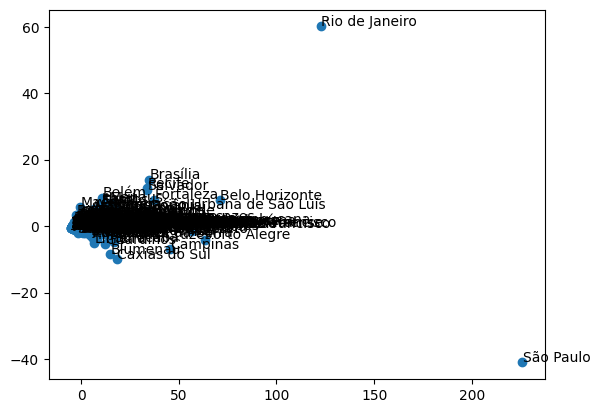

In [170]:
import random
import numpy as np                                      # Requer instalacao (via 'pip install numpy')
import pandas as pd                                     # Requer instalacao (via 'pip install wheel' e 'pip install pandas')
import matplotlib.pyplot as plt                         # Requer instalacao (via 'pip install seaborn')
import seaborn as sns                                   # Requer instalacao (via 'pip install matplotlib')
from sklearn import preprocessing                       # Requer instalacao (via 'pip install scikit-learn')
from sklearn.preprocessing import StandardScaler        # Requer instalacao (via 'pip install scikit-learn')
from sklearn.decomposition import PCA                   # Requer instalacao (via 'pip install scikit-learn')
from csv import DictReader
from os import path

##
#
#   Definicoes iniciais (caminho de arquivos raíz, encoding de caracteres no console)
#
##

# Aplicar conforme necessário

# pathBase = path.dirname( __file__ )
pathBase = path.dirname( "c:\\Users\\ivo_a\\Documents\\EACH\\2022-2\\MQA\\TrabalhoFinal\\metodos_quantitativos\\regressao_linear\\regressao_linear.py" )
# sys.stdout = io.TextIOWrapper( sys.stdout.buffer,encoding='utf8' )

##
#
#   Obtenção dos modelos
#
##

anoOuTotal = "2015"
nomeDoArquivoDeInstituicoes = "Publicacoes_Instituicoes_" + anoOuTotal + ".tsv"
nomeDoArquivoDeIndicadores = "Indicadores_Socioeconomicos_" + anoOuTotal + ".tsv"

filepath = path.abspath( path.join(pathBase, "..", "..", "dados", "4_final", "instituicoes", nomeDoArquivoDeInstituicoes))
with open(filepath, 'r', encoding='utf8') as file:
    dictReader = DictReader(file, delimiter='\t')
    listaInstituicoes = list(dictReader)

filepath = path.abspath( path.join(pathBase, "..", "..", "dados", "4_final", "regioes", "microrregioes", nomeDoArquivoDeIndicadores))
with open(filepath, 'r', encoding='utf8') as file:
    dictReader = DictReader(file, delimiter='\t')
    listaIndicadoresMicrorregioes = list(dictReader)

##
#
#   Análise de Componentes Principais
#
##

#   Calculo da produção acadêmica em cada região

for microrregiao in listaIndicadoresMicrorregioes :
    microrregiao["Publicacoes_Disciplina_Biologia"] = 0
    microrregiao["Publicacoes_Disciplina_Biotecnologia"] = 0
    microrregiao["Publicacoes_Disciplina_Especialidades_Medicas"] = 0
    microrregiao["Publicacoes_Disciplina_Engenharias_Civil_Mecanica_e_Quimica"] = 0
    microrregiao["Publicacoes_Disciplina_Quimica"] = 0
    microrregiao["Publicacoes_Disciplina_Ciencias_da_Natureza"] = 0
    microrregiao["Publicacoes_Disciplina_Engenharia_Eletrica_e_Ciencias_da_Computacao"] = 0
    microrregiao["Publicacoes_Disciplina_Pesquisas_Neurologicas"] = 0
    microrregiao["Publicacoes_Disciplina_Humanas"] = 0
    microrregiao["Publicacoes_Disciplina_Doencas_Infecciosas"] = 0
    microrregiao["Publicacoes_Disciplina_Matematica_e_Fisica"] = 0
    microrregiao["Publicacoes_Disciplina_Profissionais_da_Saude"] = 0
    microrregiao["Publicacoes_Disciplina_Ciencias_Sociais"] = 0

for instituicao in listaInstituicoes :
    idMicrorregiao = int(instituicao["ID_da_microregiao"])
    for microrregiao in listaIndicadoresMicrorregioes :
        if idMicrorregiao == int(microrregiao["ID_da_microregiao"]) :
            microrregiao["Publicacoes_Disciplina_Biologia"] += int(instituicao["Publicacoes_Disciplina_Biologia"])
            microrregiao["Publicacoes_Disciplina_Biotecnologia"] += int(instituicao["Publicacoes_Disciplina_Biotecnologia"])
            microrregiao["Publicacoes_Disciplina_Especialidades_Medicas"] += int(instituicao["Publicacoes_Disciplina_Especialidades_Medicas"])
            microrregiao["Publicacoes_Disciplina_Engenharias_Civil_Mecanica_e_Quimica"] += int(instituicao["Publicacoes_Disciplina_Engenharias_Civil_Mecanica_e_Quimica"])
            microrregiao["Publicacoes_Disciplina_Quimica"] += int(instituicao["Publicacoes_Disciplina_Quimica"])
            microrregiao["Publicacoes_Disciplina_Ciencias_da_Natureza"] += int(instituicao["Publicacoes_Disciplina_Ciencias_da_Natureza"])
            microrregiao["Publicacoes_Disciplina_Engenharia_Eletrica_e_Ciencias_da_Computacao"] += int(instituicao["Publicacoes_Disciplina_Engenharia_Eletrica_e_Ciencias_da_Computacao"])
            microrregiao["Publicacoes_Disciplina_Pesquisas_Neurologicas"] += int(instituicao["Publicacoes_Disciplina_Pesquisas_Neurologicas"])
            microrregiao["Publicacoes_Disciplina_Humanas"] += int(instituicao["Publicacoes_Disciplina_Humanas"])
            microrregiao["Publicacoes_Disciplina_Doencas_Infecciosas"] += int(instituicao["Publicacoes_Disciplina_Doencas_Infecciosas"])
            microrregiao["Publicacoes_Disciplina_Matematica_e_Fisica"] += int(instituicao["Publicacoes_Disciplina_Matematica_e_Fisica"])
            microrregiao["Publicacoes_Disciplina_Profissionais_da_Saude"] += int(instituicao["Publicacoes_Disciplina_Profissionais_da_Saude"])
            microrregiao["Publicacoes_Disciplina_Ciencias_Sociais"] += int(instituicao["Publicacoes_Disciplina_Ciencias_Sociais"])
            break

#   Categorização da atividade economica

for microrregiao in listaIndicadoresMicrorregioes :
    microrregiao["Atividade_primaria"] = "NONE"

for microrregiao in listaIndicadoresMicrorregioes :
    dictValores = {
        "valorAgropecuaria" : microrregiao["Valor_bruto_agropecuaria"],
        "valorIndustria" : microrregiao["Valor_bruto_industria"],
        "valorServicos" : microrregiao["Valor_bruto_servicos"],
        "valorAdministracao" : microrregiao["Valor_bruto_administracao"]
    }

    valorMaximo = max(dictValores, key=dictValores.get)

    if valorMaximo == "valorAgropecuaria" :
        microrregiao["Atividade_primaria"] = "AGROPECUARIA"
    elif valorMaximo == "valorIndustria" :
        microrregiao["Atividade_primaria"] = "INDUSTRIA"
    elif valorMaximo == "valorServicos" :
        microrregiao["Atividade_primaria"] = "SERVICOS"
    elif valorMaximo == "valorAdministracao" :
        microrregiao["Atividade_primaria"] = "ADMINISTRACAO"

#   Aplicação da ACP

dataframeMicrorregioes = pd.DataFrame(listaIndicadoresMicrorregioes)
dataframeMicrorregioes.drop(
    columns=["nome_da_microrregiao"],
    axis=1,
    inplace=True
)
dataframeMicrorregioes.drop(
    columns=["Atividade_primaria"],
    axis=1,
    inplace=True
)
for indice in dataframeMicrorregioes.keys() :
    dataframeMicrorregioes[indice] = pd.to_numeric(dataframeMicrorregioes[indice])


corr = dataframeMicrorregioes.corr()

# heatmap = sns.heatmap(corr,
#     xticklabels=False,
#     yticklabels=False,
#     cmap="YlGnBu"
# )

x = dataframeMicrorregioes.values

scaler = StandardScaler().fit(x)
scaled_x = scaler.transform(x)

listaNomes = []
for microrregiao in listaIndicadoresMicrorregioes:
    listaNomes.append( microrregiao["nome_da_microrregiao"] )

dataframeMicrorregioes2 = pd.DataFrame( 
    data=scaled_x,
    columns=dataframeMicrorregioes.columns,
    index=listaNomes
)

pca = PCA(n_components=2)
pca_decomp = pca.fit(scaled_x)
pca_x = pca.fit_transform(scaled_x)

pca_x
principalDf = pd.DataFrame( 
    data=pca_x,
    columns=['PC1','PC2'],
    index=dataframeMicrorregioes2.index
)

fig, ax = plt.subplots(1,1)
ax.scatter(principalDf['PC1'],principalDf['PC2'])
for index, series in principalDf.iterrows():
    ax.text(series[0]+0.2,series[1]+0.2, index)

# ax.set_ylim(-15,15)
# ax.set_xlim(-15,80)
# ax.grid()

pd.DataFrame(
    pca_decomp.components_, 
    columns=dataframeMicrorregioes2.columns
)
